# Community alignment of training questions

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
from ollama_models import ollama_models
models = ollama_models()

In [3]:
models

['deepseek-r1:1.5b-qwen-distill-q4_K_M']

In [4]:
from community_alignment import community_alignment

Loaded existing index from forecast_index.faiss
Index contains 5834 vectors at initialization


100%|██████████████████████████████████████| 113/113 [00:00<00:00, 29644.51it/s]

saved community_deepseek-r1:1.5b-qwen-distill-q4_K_M.json


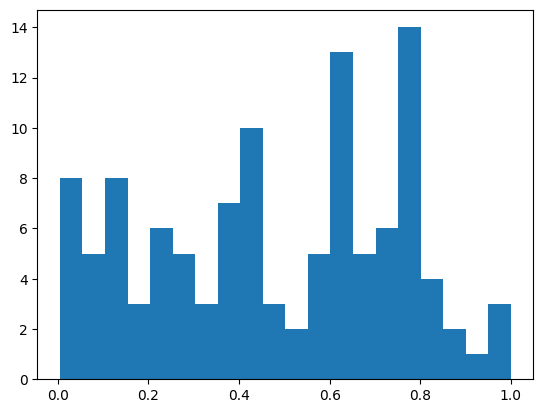

In [5]:
dfs = {}
for model in models:
    df = community_alignment(model)
    dfs[model] = df

In [21]:
for model in models:
    df = dfs[model]
    df1 = df[['model', 'id', 'title', 'error']].sort_values(by='id')
    display(df1)

,model,id,title,error
108,deepseek-r1:1.5b-qwen-distill-q4_K_M,491,Will China reduce their carbon emissions per G...,0.200
54,deepseek-r1:1.5b-qwen-distill-q4_K_M,736,Will there be a complete 4 year interval in wh...,0.230
76,deepseek-r1:1.5b-qwen-distill-q4_K_M,841,Will Metaculus exist in 2030?,0.150
88,deepseek-r1:1.5b-qwen-distill-q4_K_M,899,Will the richest person in the world in 2033 h...,0.260
102,deepseek-r1:1.5b-qwen-distill-q4_K_M,980,Will Tesla become the largest car company in t...,0.880
...,...,...,...,...
5,deepseek-r1:1.5b-qwen-distill-q4_K_M,21531,Will the bubble in the Magnificent Seven pop b...,0.560
93,deepseek-r1:1.5b-qwen-distill-q4_K_M,21914,Will Bryan Caplan win his bet that real gross ...,0.151
112,deepseek-r1:1.5b-qwen-distill-q4_K_M,22523,Will the U.S. employment to population ratio f...,0.845
22,deepseek-r1:1.5b-qwen-distill-q4_K_M,26721,Will the S&P 500 Index increase over the year ...,0.120


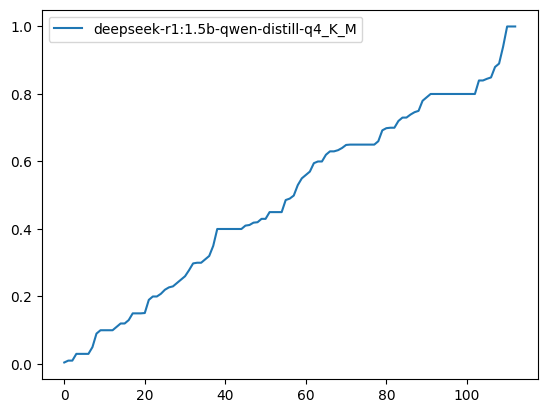

In [7]:
import matplotlib.pylab as plt
errors = []
for model in models:
    df = dfs[model]
    errors.append((model, df.error.median()))
    plt.plot(sorted(df['error'].values.tolist()), label=model)
plt.legend();

In [8]:
import json
with open('id_to_category.json', 'r') as f:
    id_to_category = json.load(f)

In [10]:
for id in id_to_category:
    if 'Environ' in id_to_category[id]:
        id_to_category[id] = 'Environment'

In [12]:
df1

,model,id,title,error
108,deepseek-r1:1.5b-qwen-distill-q4_K_M,491,Will China reduce their carbon emissions per G...,0.200
54,deepseek-r1:1.5b-qwen-distill-q4_K_M,736,Will there be a complete 4 year interval in wh...,0.230
76,deepseek-r1:1.5b-qwen-distill-q4_K_M,841,Will Metaculus exist in 2030?,0.150
88,deepseek-r1:1.5b-qwen-distill-q4_K_M,899,Will the richest person in the world in 2033 h...,0.260
102,deepseek-r1:1.5b-qwen-distill-q4_K_M,980,Will Tesla become the largest car company in t...,0.880
...,...,...,...,...
5,deepseek-r1:1.5b-qwen-distill-q4_K_M,21531,Will the bubble in the Magnificent Seven pop b...,0.560
93,deepseek-r1:1.5b-qwen-distill-q4_K_M,21914,Will Bryan Caplan win his bet that real gross ...,0.151
112,deepseek-r1:1.5b-qwen-distill-q4_K_M,22523,Will the U.S. employment to population ratio f...,0.845
22,deepseek-r1:1.5b-qwen-distill-q4_K_M,26721,Will the S&P 500 Index increase over the year ...,0.120


In [13]:
id_to_category = {int(x): id_to_category[x] for x in id_to_category}

In [14]:
df['category'] = df.id.apply(lambda x: id_to_category[x])

In [15]:
dfe = df[['category', 'error']]

In [18]:
result_df = dfe.groupby('category').agg(
    mean_error=('error', 'mean'),
    count=('error', 'size')
).reset_index()

In [19]:
result_df.sort_values(by='mean_error')

,category,mean_error,count
0,Economic Trends,0.488666,113


In [25]:
pd.set_option('display.max_colwidth', None)

In [26]:
df1[['id', 'title', 'error']].sort_values(by='error', ascending=False)

,id,title,error
110,4083,"What will be the relative severity of the next US depression, compared to the Great Depression?",1.000000
4,3095,What will the US market for plant-based meat be worth in the year ending in April 2028?,1.000000
53,4830,What will the global fertility rate be in 2050?,1.000000
83,17763,Will Threads report more monthly active users than Twitter before 2026?,0.940000
12,12348,Will 3M file for bankruptcy before 2026?,0.890000
...,...,...,...
17,3665,Will renewable energy contribute between 25% and 48% to global electricity production in 2030?,0.030000
70,15146,Will Russia’s GDP (in 2015 USD) be at least $1.50 trillion in 2030?,0.030000
21,15964,Will 10% or more of the top 20 biggest companies in early 2023 still be in the top 20 in 2050?,0.010000
90,8583,Will at least 10 of the 20 highest grossing new movies in the year 2050 be remakes of previous movies or continuations of previous movie franchises?,0.010000


In [30]:
print(df[df.id==4083].iloc[0].forecast)

<think>

Percentile | Time Left (Days) | Outcome
---|---|---
10 | Not specified | - |
20 | 365 | Not specified |
40 | 365 | Not specified |
60 | 365 | Not specified |
80 | 365 | Not specified |
90 | 365 | Not specified |

### Forecast

Percentile 10: -1.0
